In [14]:
from pulser import Pulse, Sequence, Register
import numpy as np

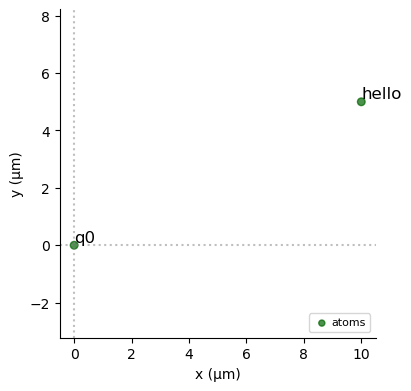

In [4]:
# building a register = giving coordinates of qubits
# units = micrometers

qubit_dict = {
    'q0': [0, 0],
    'hello': [10, 5]
}

register = Register(qubit_dict)
register.draw()

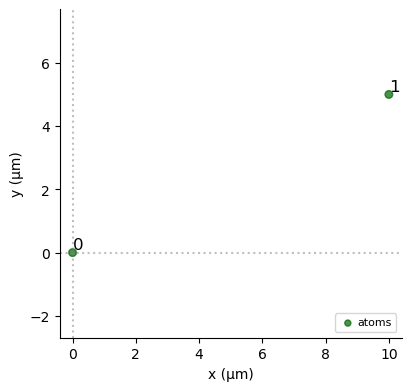

In [10]:
qubit_coords = [[0,0],[10,5]]

register1 = Register.from_coordinates(qubit_coords, center=False)
register1.draw()

In [11]:
from pulser.devices import MockDevice

sequence = Sequence(register, MockDevice)

In [13]:
sequence.declare_channel('ch', 'rydberg_global')

In [ ]:
pulse = Pulse.ConstantPulse(
    duration=2000, #nanoseconds
    amplitude=4*np.pi,
    detuning=0,
    phase=0 #don't worry about phase
)

In [16]:
sequence.add(pulse, 'ch')

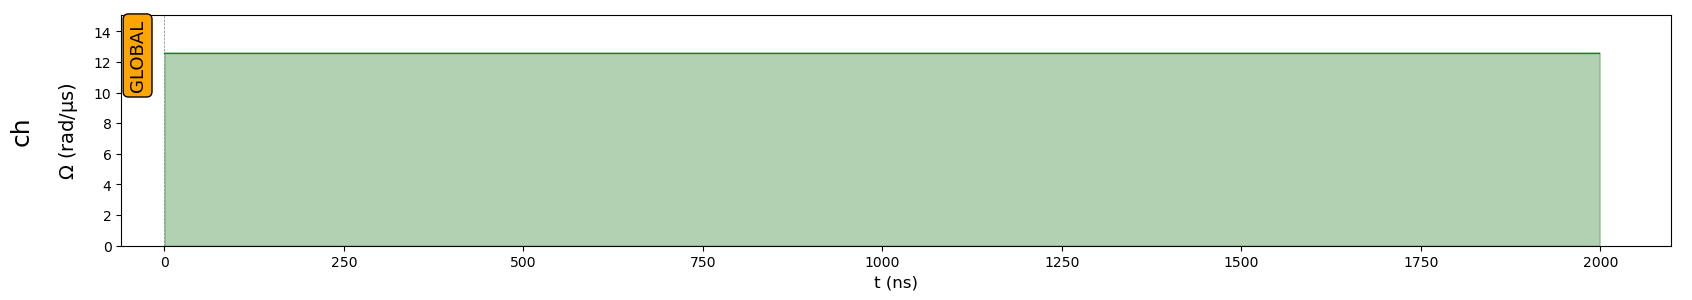

In [17]:
sequence.draw()

In [18]:
from pulser_simulation import QutipEmulator

In [19]:
simulation = QutipEmulator.from_sequence(sequence)

In [21]:
result = simulation.run()

In [22]:
result.sample_final_state(1000)

Counter({'00': 599, '11': 353, '01': 26, '10': 22})

In [ ]:
# 1) create a register
# 2) import a device
# 3) create a sequence from register+device
# 4) declare a laser channel
# 5) create a pulse
# 6) add pulse to the channel
# 7) create simulation object
# 8) run the simulation
# 9) sample final state